# Exploratory Data Analysis: Brain Tumor Images (no_tumor vs glioma_tumor)

This notebook performs an exploratory data analysis (EDA) on the dataset located in `data/dataset_v2`, focusing on binary classification between `no_tumor` and `glioma_tumor`.

## 1. Import Libraries
We import the necessary libraries for data loading, processing, and visualization.

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
%matplotlib inline

## 2. Data Loading
We list and count images in the `no_tumor` and `glioma_tumor` folders.

In [21]:
import os

data_dir = 'data/dataset_v2/Training/'
classes = ['no_tumor', 'glioma_tumor']

for label in classes:
    class_dir = os.path.join(data_dir, label)
    if not os.path.exists(class_dir):
        print(f"Directory does not exist: {class_dir}")
    else:
        files = [f for f in os.listdir(class_dir) if f.lower().endswith('.jpg')]
        print(f"{label}: {len(files)} images")

no_tumor: 395 images
glioma_tumor: 826 images


In [22]:
data_dir = 'data/dataset_v2/Training/'
classes = ['no_tumor', 'glioma_tumor']

image_paths = []
labels = []
for label in classes:
    class_dir = os.path.join(data_dir, label)
    files = [f for f in os.listdir(class_dir) if f.lower().endswith('.jpg')]
    image_paths.extend([os.path.join(class_dir, f) for f in files])
    labels.extend([label] * len(files))

df = pd.DataFrame({'image_path': image_paths, 'label': labels})
print('Total images:', len(df))
print(df['label'].value_counts())
df.sample(5)

Total images: 1221
label
glioma_tumor    826
no_tumor        395
Name: count, dtype: int64


,image_path,label
97,data/dataset_v2/Training/no_tumor\image(125).jpg,no_tumor
519,data/dataset_v2/Training/glioma_tumor\gg (210)...,glioma_tumor
1100,data/dataset_v2/Training/glioma_tumor\gg (734)...,glioma_tumor
305,data/dataset_v2/Training/no_tumor\image(312).jpg,no_tumor
289,data/dataset_v2/Training/no_tumor\image(299).jpg,no_tumor


## 3. Class Distribution
We visualize the class distribution.

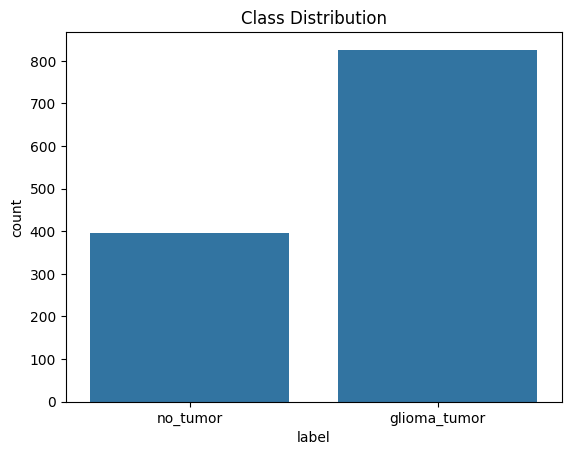

In [23]:
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()

## 4. Image Size Statistics
We compute statistics about image sizes (width, height).

             width       height
count  1221.000000  1221.000000
mean    459.483210   460.503686
std     137.781321   126.526986
min     200.000000   198.000000
25%     442.000000   480.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1375.000000  1446.000000


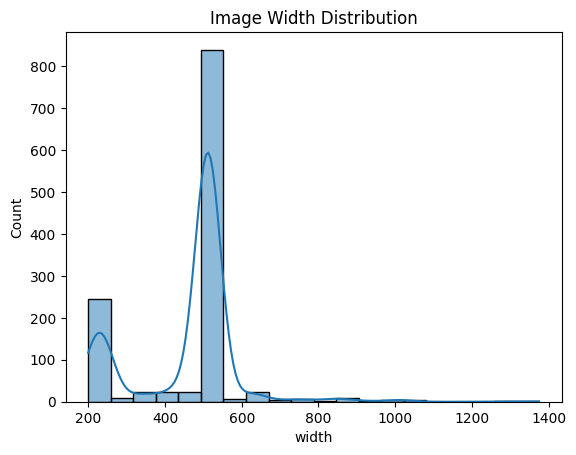

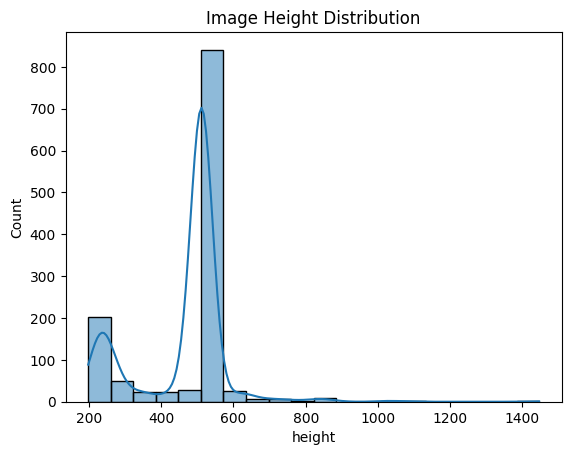

In [24]:
def get_image_size(path):
    try:
        with Image.open(path) as img:
            return img.size  # (width, height)
    except Exception as e:
        return None

df['size'] = df['image_path'].apply(get_image_size)
df['width'] = df['size'].apply(lambda x: x[0] if x else np.nan)
df['height'] = df['size'].apply(lambda x: x[1] if x else np.nan)
print(df[['width', 'height']].describe())
sns.histplot(df['width'].dropna(), kde=True, bins=20)
plt.title('Image Width Distribution')
plt.show()
sns.histplot(df['height'].dropna(), kde=True, bins=20)
plt.title('Image Height Distribution')
plt.show()

## 5. Check for Corrupted or Null Images
We identify images that could not be opened or are null.

In [25]:
corrupted = df[df['size'].isnull()]
print(f'Corrupted or unreadable images: {len(corrupted)}')
if len(corrupted) > 0:
    display(corrupted)
# Remove corrupted images
df = df[df['size'].notnull()].reset_index(drop=True)

Corrupted or unreadable images: 0


## 6. Class Balancing
We balance the dataset by downsampling the majority class.

label
glioma_tumor    395
no_tumor        395
Name: count, dtype: int64


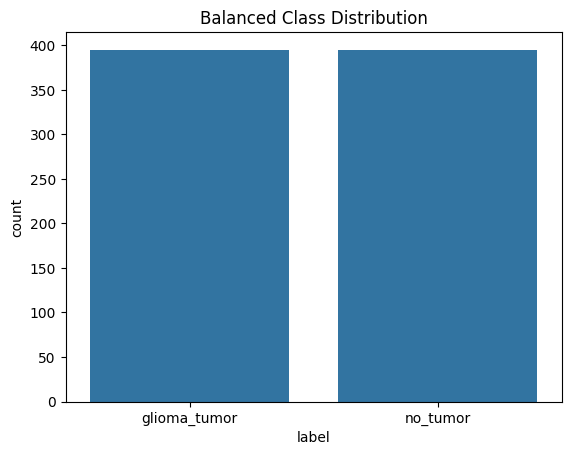

In [26]:
min_count = df['label'].value_counts().min()
df_balanced = df.groupby('label').sample(n=min_count, random_state=42).reset_index(drop=True)
print(df_balanced['label'].value_counts())
sns.countplot(x='label', data=df_balanced)
plt.title('Balanced Class Distribution')
plt.show()

## 7. Visualize Example Images
We show random samples from each class.

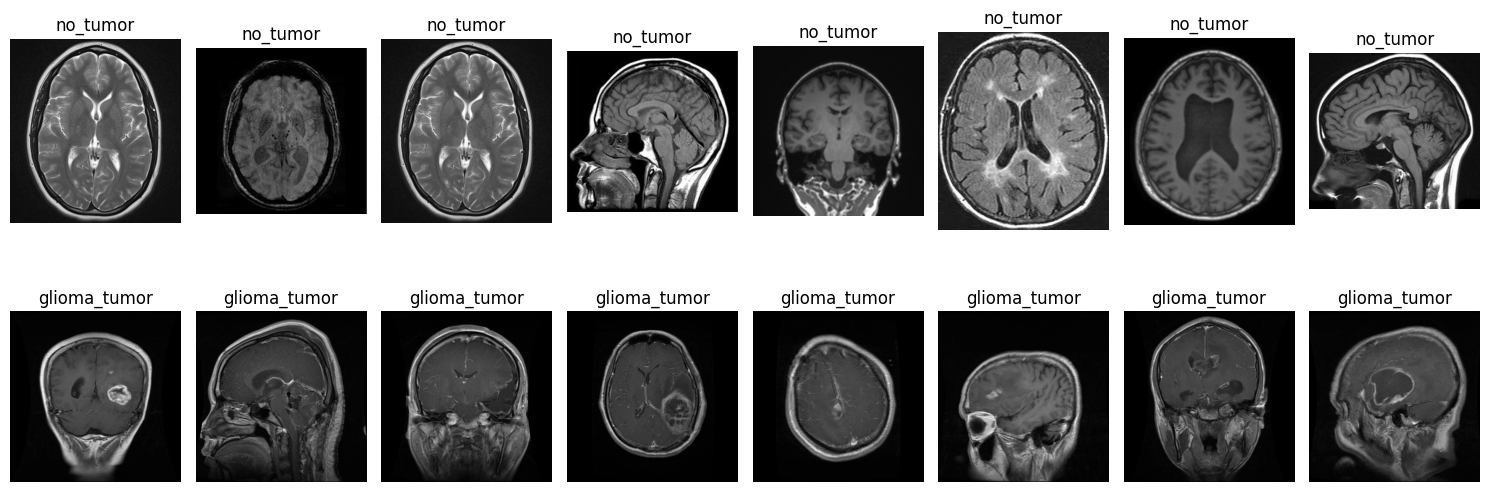

In [36]:
fig, axes = plt.subplots(2, 8, figsize=(15, 6))
for i, label in enumerate(classes):
    samples = df_balanced[df_balanced['label'] == label].sample(8, random_state=42)
    for j, (idx, row) in enumerate(samples.iterrows()):
        img = Image.open(row['image_path'])
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(label)
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

## 8. Conclusions
Summary of the findings and recommendations for further processing or model training.